In [30]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def datasets_make_regression(coef, data_size, noise_sigma, random_state):
    x = np.arange(0, data_size, 1.)
    mu = 0.0
    random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size, 1))

    for i in range(data_size):
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = coef[0] + coef[1]*x[i] + noise[i]

    return x, y

Text(0, 0.5, 'y (оценка температуры)')

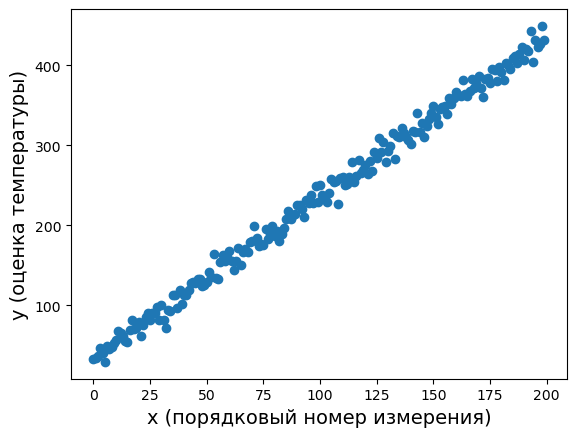

In [32]:
coef_true = [34.2, 2.] # весовые коэффициенты
data_size = 200 # размер генерируемого набора данных
noise_sigma = 10 # СКО шума в данных
random_state = 42
x_scale, y_estimate = datasets_make_regression(coef_true, data_size, noise_sigma, random_state)

plt.plot(x_scale, y_estimate, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

In [33]:
def coefficient_reg_inv(x, y):
    size = len(x)
    # формируем и заполняем матрицу размерностью 2x2
    A = np.empty((2, 2))
    A[[0], [0]] = sum((x[i])**2 for i in range(0,size))
    A[[0], [1]] = sum(x)
    A[[1], [0]] = sum(x)
    A[[1], [1]] = size
    # находим обратную матрицу
    A = np.linalg.inv(A)
    # формируем и заполняем матрицу размерностью 2x1
    C = np.empty((2, 1))
    C[0] = sum((x[i]*y[i]) for i in range(0,size))
    C[1] = sum((y[i]) for i in range(0,size))

    # умножаем матрицу на вектор
    ww = np.dot(A, C)
    return ww[1], ww[0]

[w0_1, w1_1] = coefficient_reg_inv (x_scale, y_estimate)
print(w0_1, w1_1)

[33.93193341] [2.01436546]


In [34]:
from sklearn.linear_model import LinearRegression
# преобразование размерности массива x_scale для корректной работы model.fit
x_scale = x_scale.reshape((-1,1))
model = LinearRegression()
model.fit(x_scale, y_estimate)
print(model.intercept_, model.coef_)

[33.93193341] [[2.01436546]]


# Параболическая функция

In [122]:
def generate_data(coefficient, size: int, sigma):
    x = np.arange(0, size, 1)
    y = coefficient[0] * (np.power(x, 2)) + coefficient[1] * x + coefficient[2]
    noise = np.random.normal(loc=0, scale= sigma, size=size) # noise generation
    y += noise
    return x, y

Text(0, 0.5, 'y (оценка температуры)')

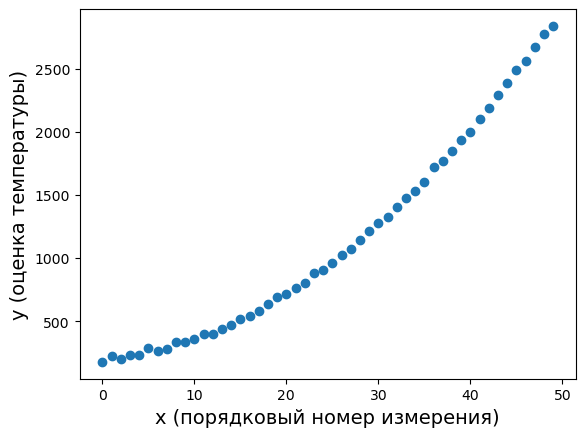

In [127]:
coef_true = [1, 5.4, 200] # весовые коэффициенты
data_size = 50 # размер генерируемого набора данных
noise_sigma = 15 # СКО шума в данных
x_scale, y_estimate = generate_data(coef_true, data_size, noise_sigma)

plt.plot(x_scale, y_estimate, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

In [128]:
z = np.poly1d(np.polyfit(x_scale,y_estimate,2))
z

poly1d([  0.98445153,   6.13891401, 199.28414077])